<a href="https://colab.research.google.com/github/ACM-Research/parametric-design-sustainable-living/blob/main/Fuzzy_C_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 5.3 MB/s 


In [ ]:
# Set-Up and Imports
%matplotlib inline
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
import pandas as pd

training_data = pd.read_excel('training (1).xlsx')

# prune categorical data
training_data.drop(['Option','location','floorplan'], axis = 1, inplace=True)
training_data.columns


Index(['Observed GWP (assessed)', 'buildingheight', 'buildinglength',
       'buildingwidth', 'floorarea', 'orientation', 'roomwidith',
       'mroomlength', 'mroomwidith', 'roomlength', 'passwidth',
       'elevationheight', 'roomnumber', 'meetingroomnumber', 'floornumber'],
      dtype='object')

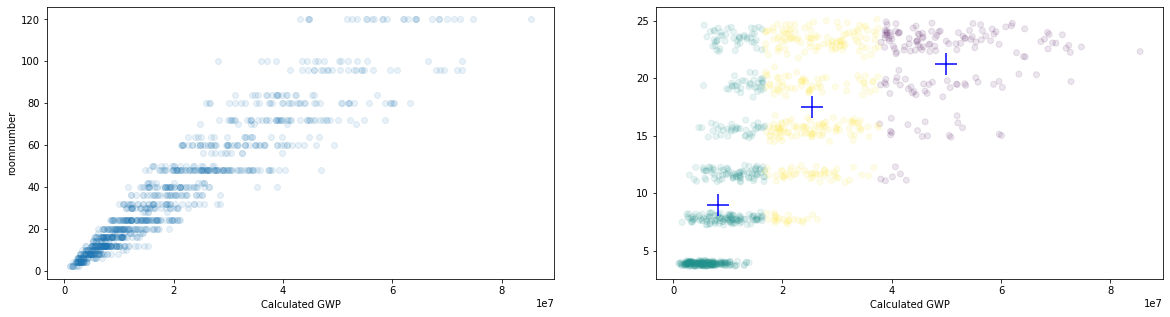

In [ ]:
# Cluster Data and Show Results with 3 Clusters
my_model = FCM(n_clusters=3)
X = training_data.to_numpy()
my_model.fit(X)

fcm_centers = my_model.centers
fcm_labels = my_model.predict(X)

columnToLookAt = 12

f, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].scatter(X[:,0], X[:,columnToLookAt], alpha=.1)
axes[0].set_xlabel("Calculated GWP")
axes[0].set_ylabel(training_data.columns[columnToLookAt])

# c = data points are mapped to colors based on what cluster they belong to

axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b')
axes[1].set_xlabel("Calculated GWP")
plt.show()

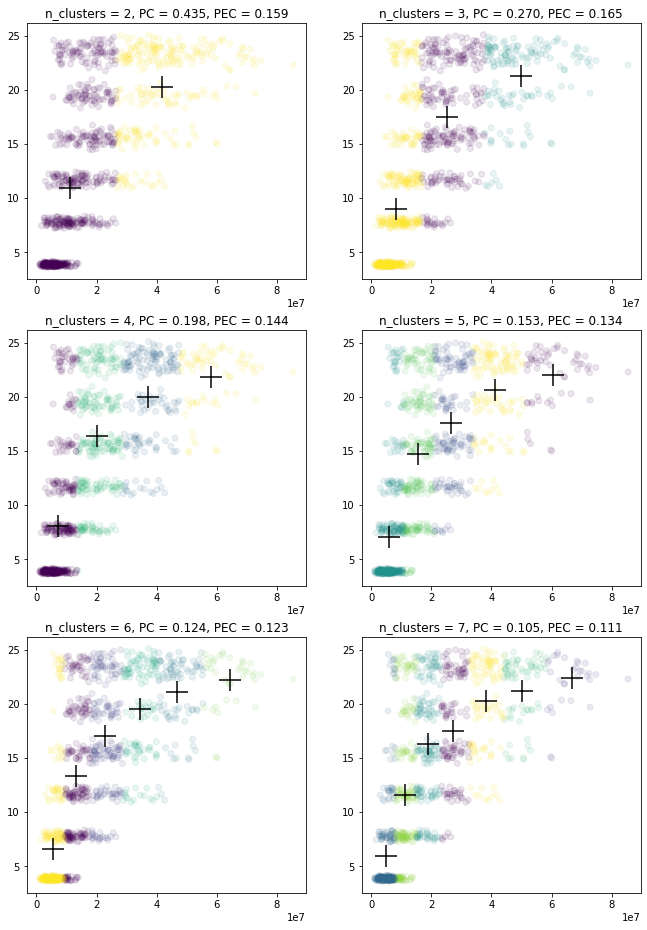

In [ ]:
# Try Multiple Clusters and Validate
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X)
    models.append(fcm)

num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # validation metrics

    # pc = how cleanly the data is described by the model (higher is better)
    pc = model.partition_coefficient 
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()